In [2]:
# 데이터 준비 

from keras.datasets import imdb # 영화 리뷰 긍정부정 
from keras import preprocessing 

max_features = 10000 # 10000개의 단어를 
max_len = 20 # 20차원으로 표현 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = max_len) # 20개로 길이 맞춰주기 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = max_len) # 20개로 길이 맞춰주기 


In [5]:
# layer 생성 

from keras.models import Sequential 
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length = max_len)) # 10000개의 단어를 8차원에 점찍음 
model.add(Flatten()) # 1차원으로 펴줌 
model.add(Dense(1, activation = 'sigmoid')) # 결과값이 binary라서 1개의 output으로 해줌 

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6687 - acc: 0.6231 - val_loss: 0.6177 - val_acc: 0.6986
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5440 - acc: 0.7504 - val_loss: 0.5271 - val_acc: 0.7322
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4638 - acc: 0.7870 - val_loss: 0.5008 - 

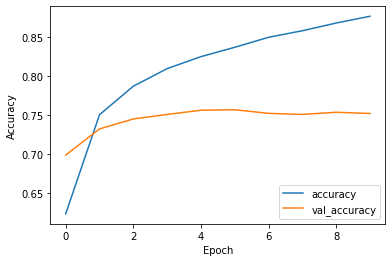

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label = 'accuracy') 
plt.plot(history.history['val_acc'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

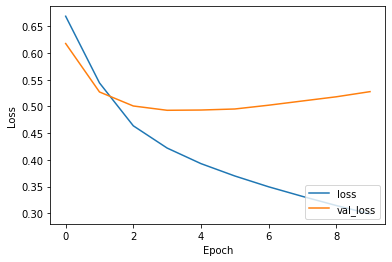

In [13]:
plt.plot(history.history['loss'], label = 'loss') 
plt.plot(history.history['val_loss'], label = 'val_loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'lower right')
plt.show()

여기서는 epoch를 4정도로 하는 것이 제일 좋아보인다. 
loss값이 가장 작은 걸 골라서 해주면 됨 